In [1]:
import numpy as np
from scipy import stats
from scipy.special import gammaln as gml
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data from (BDA3, p. 102)
y = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
    1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 5, 2,
    5, 3, 2, 7, 7, 3, 3, 2, 9, 10, 4, 4, 4, 4, 4, 4, 4,
    10, 4, 4, 4, 5, 11, 12, 5, 5, 6, 5, 6, 6, 6, 6, 16, 15,
    15, 9, 4
])
n = np.array([
    20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 18, 18, 17, 20, 20, 20,
    20, 19, 19, 18, 18, 25, 24, 23, 20, 20, 20, 20, 20, 20, 10, 49, 19,
    46, 27, 17, 49, 47, 20, 20, 13, 48, 50, 20, 20, 20, 20, 20, 20, 20,
    48, 19, 19, 19, 22, 46, 49, 20, 20, 23, 19, 22, 20, 20, 20, 52, 46,
    47, 24, 14
])

In [3]:
A = np.linspace(0.5, 6, 100)
B = np.linspace(3, 33, 100)

LP = (-5/2 * np.log(A + B[:,None]) + np.sum(gml(A + B[:,None]) - gml(A) - gml(B[:,None]) + gml(A + y[:,None,None]) + gml(B[:,None] + (n - y)[:,None,None]) - gml(A + B[:,None] + n[:,None,None]), axis=0))
LP -= LP.max()
p = np.exp(LP)
p /= p.sum()

# Rejection sampling
x = []
y = []
g_Mu = [11, 1.9]
g_Cov = [[16, 2.7], [2.7, 0.5]]
g = np.zeros([B.shape[0], A.shape[0]])
for j in range(B.shape[0]):
    for i in range(A.shape[0]):
        temp = [B[j], A[i]]
        x.append(B[j])
        y.append(A[i])
        g[j, i] = stats.multivariate_normal.pdf(temp, g_Mu, g_Cov)
        
g /= g.sum()

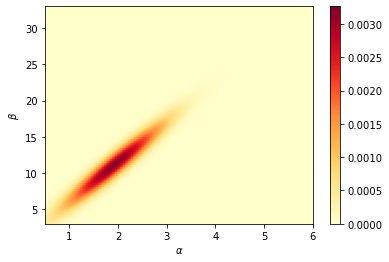

In [4]:
plt.imshow(g, origin='lower', aspect='auto', extent=(A[0], A[-1], B[0], B[-1]), cmap = 'YlOrRd')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
# plt.grid('off')
plt.colorbar()
plt.show()

In [5]:
M = np.max(p/g)
g *= M

sample_size = 2000
sam_x, sam_y = np.random.multivariate_normal(size=sample_size, mean=g_Mu, cov=g_Cov).T
X = np.asarray(x)
Y = np.asarray(y)

idx = np.argmin((X[:, None] - sam_x) ** 2 + (Y[:, None] - sam_y) ** 2, axis=0)
posB, posA = divmod(idx, A.shape[0])
acc = np.random.rand(sample_size) * g[posB, posA]
acc = acc < p[posB, posA]

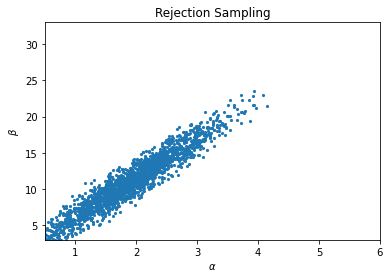

In [6]:
sampleA = A[posA]
sampleB = B[posB]
sampleA += (np.random.rand(sample_size) - 0.5) * (A[1]-A[0])
sampleB += (np.random.rand(sample_size) - 0.5) * (B[1]-B[0])

plt.scatter(sampleA, sampleB, 10, linewidth=0)
plt.xlim([A[0], A[-1]])
plt.ylim([B[0], B[-1]])
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.title('Rejection Sampling')
plt.show()

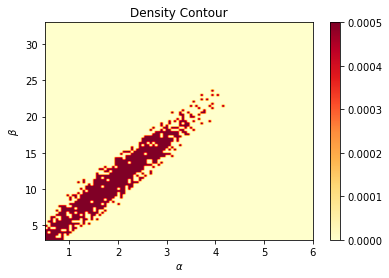

In [7]:
m = np.zeros([B.shape[0], A.shape[0]])
samp_A = A[posA]
samp_B = B[posB]
m[posB, posA] = 1
m /= len(posA)
plt.imshow(m, origin='lower', aspect='auto', extent=(A[0], A[-1], B[0], B[-1]), cmap = 'YlOrRd')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.title('Density Contour')
plt.colorbar()
plt.show()